In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(image_train, label_train), (image_test, label_test) = mnist.load_data()
image_train, image_test = image_train / 255.0, image_test / 255.0
print("image_train.shape:", image_train.shape[1])

image_train.shape: 28


In [5]:
    if tf.test.is_built_with_cuda():
      print("The installed version of TensorFlow includes GPU support.")

The installed version of TensorFlow includes GPU support.


In [6]:
#tf.debugging.set_log_device_placement(True)

#gpus = tf.config.list_logical_devices('GPU')
#strategy = tf.distribute.MirroredStrategy(gpus)
with tf.device('/device:GPU:0'):

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10)
    ])

    tf.debugging.set_log_device_placement(True)


    predictions = model(image_train[:1]).numpy()

    print("predictions: \n", predictions)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    print("loss: \n", loss_fn(label_train[:1], predictions).numpy())


    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    model.fit(image_train, label_train, epochs=5)

    print("evaluation: \n")

    model.evaluate(image_test,  label_test, verbose=2)

    probability_model = tf.keras.Sequential([
      model,
      tf.keras.layers.Softmax()
    ])

    print("probabilities: \n", probability_model(image_test[:5]))

predictions: 
 [[ 0.25997785  0.31999373  0.6031638   0.63612145 -0.89297533  0.14573877
   0.02621993 -0.57780933  0.5208998   0.07365183]]
loss: 
 2.364271
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2962 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1468 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1067 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0910 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0771 - accuracy: 0.9766
evaluation: 

313/313 - 2s - loss: 0.0748 - accuracy: 0.9784
probabilities: 
 tf.Tensor(
[[8.8948511e-08 6.5801470e-10 4.2761972e-06 1.5438772e-04 1.0770507e-12
  6.5910535e-07 1.9921798e-13 9.9983633e-01 1.7772483e-07 3.9529991e-06]
 [5.4205074e-10 2.1770675e-05 9.9994802e-01 2.7024453e-06 6.2285313e-16
  2.4013172e-05 1.5356883e

[7 2 1 ... 4 5 6]
(10000,)


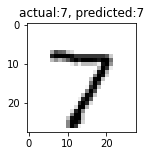

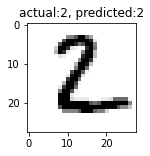

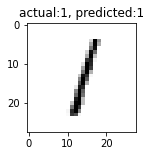

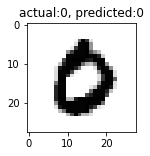

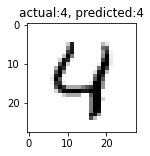

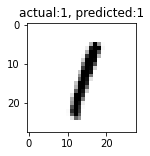

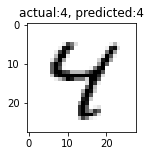

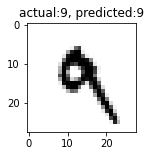

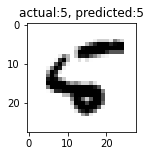

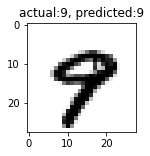

In [7]:
#hashmap
classes = {i:chr(i+48) for i in range(10)}
classes

# get an image and its actual label/class
# the batch size in data_test is 1, each batch contains 1 sample 

# predict label
test_label_pred = np.argmax(probability_model.predict(image_test), axis = 1)

print(test_label_pred)
print(test_label_pred.shape)

for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(image_test[i], cmap='binary')
    plt.title(f'actual:{classes[label_test[i]]}, predicted:{classes[test_label_pred[i]]}')

In [9]:
!mkdir -p saved_model
model.save('saved_model/my_model')

ERROR: ld.so: object '/' from LD_PRELOAD cannot be preloaded (cannot read file data): ignored.
ERROR: ld.so: object '/' from LD_PRELOAD cannot be preloaded (cannot read file data): ignored.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


(28, 28, 1)
[1]


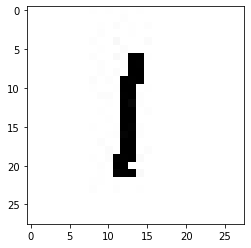

In [69]:
#img_width, img_height = 28, 28
#img = tf.keras.preprocessing.image.load_img('5.jpg', target_size = (img_width, img_height))
#img = tf.keras.preprocessing.image.img_to_array(img)
#img = np.expand_dims(img, axis = 0)


img = cv2.imread('./data/1-1.jpg')

img = cv2. cvtColor(img, cv2.COLOR_BGR2GRAY)

img=cv2.resize(img, (28,28)) # resize to 28,28 as that is on which model is trained on

img = np.expand_dims(img, 2)

img = ~img

print(img.shape)

plt.imshow(img,cmap='binary')

#img = tf.expand_dims(img, 0) # expand the dims means change shape from (180, 180, 3) to (1, 180, 180, 3)
prediction = np.argmax(probability_model.predict(img), axis = 1)
print(prediction)